# PROCESSING


### Create Shape

In [30]:
from shapely.geometry.polygon import Polygon

def GetVerticesFromFile(file):
  lines = []
  with open(file, "r") as f:
    lines = f.readlines()
  
  shapes = []
  vertices = []
  for line in lines:
    # End of Shape
    if not line.strip():
      shapes.append(vertices)
      vertices = []
      continue
    
    vertices.append((float(line.split(',')[0]), float(line.split(',')[1])))
  shapes.append(vertices)
  
  return shapes


def CreateShape(outer, holes):
  # OUTER
  outerRing = GetVerticesFromFile(outer)[0]

  #HOLES
  holeRings = []
  for hole in holes:
    holeRing = GetVerticesFromFile(hole)
    holeRings += holeRing


  return Polygon(outerRing, holeRings)

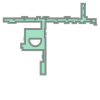

### Process File

In [32]:
from shapely.geometry import Point

# CREATE HALLWAY SHAPE
hallway = CreateShape("HallwayVertices.txt", ["SemiCircleRoomVertices.txt", "ColumnVertices.txt"])


# PROCESS RECEIVER POSITIONS
lines = []

r = open("ReceiverPositions_environment.dat", "r")
w = open("ReceiverPositions_environment_processed.dat", "w")
lines = r.readlines()
newLines = []
newLines.append(lines[0])

pointCount = 0
points = []
for line in lines[2:-1]:
  point = Point((float(line.split()[0]), float(line.split()[1])))
  if hallway.contains(point):
    pointCount += 1
    points.append(line)

newLines = newLines + [str(pointCount)+'\n'] + points

newLines.append(lines[-1])

w.writelines(newLines)

r.close()
w.close()

### Vis

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon


def vis(file, shape=None):
  lines = []
  with open(file, "r") as f:
    lines = f.readlines()
  lines = lines[2:-1]
  receiverPositions = []
  for line in lines:
    receiverPositions.append((float(line.split()[0]), float(line.split()[1])))

  positionsArray = np.array(receiverPositions)

  if shape is not None:
    valid = []
    for position in receiverPositions:
      point = Point(position[0], position[1])
      valid.append(shape.contains(point))
    positionsArray = positionsArray[valid]

  x, y, z = [], [], []
  for position in positionsArray:
      x.append(position[0])
      y.append(position[1])

  plt.scatter(x, y, s=0.1)
  plt.show()

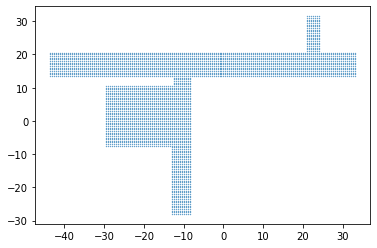

In [34]:
vis("ReceiverPositions_environment.dat")

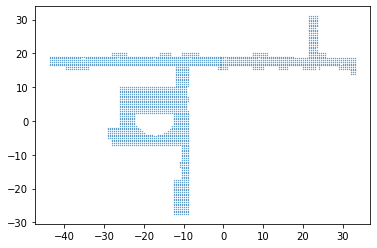

In [35]:
vis("ReceiverPositions_environment_processed.dat", hallway)